#BRYAN ANDRES HERRERA - 2244008
#ALESSANDRO YUSTY CEBALLOS - 2240248
Universidad Autonoma de Occidente

Ingenieria en Datos E IA

---

##**ODS 13 (Acción por el Clima)**
Este exige mecanismos para mejorar la capacidad de planificación y gestión en relación con el cambio climático. Esta base de datos no es solo un registro estadístico; es el insumo crítico para:

- Monitoreo de Anomalías: Al proporcionar datos horarios y diarios de temperatura, precipitación y eventos severos, permite identificar patrones de cambio climático a nivel local.

- Adaptación Basada en Datos: La precisión de la NOAA permite a las ciudades y regiones desarrollar estrategias de resiliencia ante fenómenos extremos, cumpliendo con la meta de fortalecer la resiliencia y la capacidad de adaptación.

La base de datos de la NOAA destacó por:

- Facilidad de Extracción: Ofrece datos a nivel de estación meteorológica individual.
- Normalización: Los datos de LCD vienen con esquemas definidos, unidades de medida estándar (Sistema Internacional o Imperial claramente marcados).
- Consistencia: La continuidad de los registros permite realizar series de tiempo sin huecos significativos.

---

Presentamos el proyecto 'Analisis Estadistico del Comportamiento Climatico', en el que ponemos en practica los conocimientos en ETL adquiridos en clase hasta el primer corte.

*Objetivos:*
1. Exploracion de DataSet(NOAA)
2. Extraccion de datos (NOAA)
3. Creacion Base de datos relacional(SQLite)
4. Carga de datos de crudo
5. Consulta a la BD
6. Desglose y Estandarización de Fechas (Time Series)
7. Tratamiento de Valores Nulos (Imputación)


##**Diagrama del proceso**

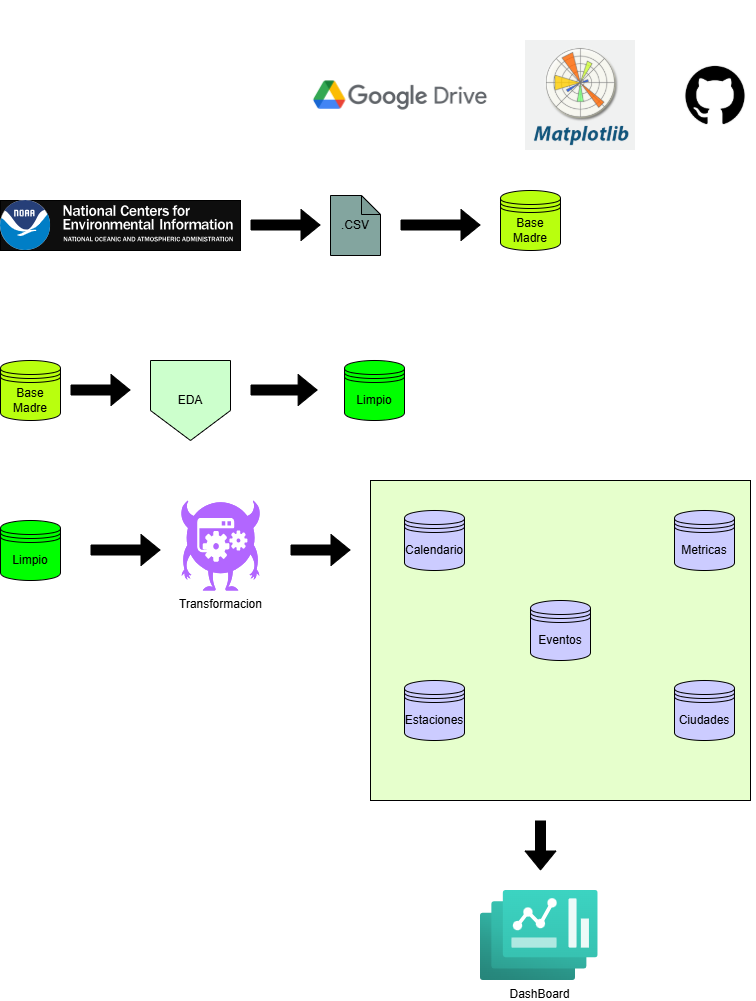

Montamos e inicializamos Google Drive

In [43]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Definimos nuestra RUTA base donde se encontrarán nuestras carpetas

In [44]:
import os

base_path = "/content/drive/My Drive/Colab Notebooks/Curso ETL/Proyecto1"
folders = ["config", "data", "logs", "notebooks", "src", "utils", "BD"]

for folder in folders:
    path = os.path.join(base_path, folder)
    os.makedirs(path, exist_ok=True)

print("✅ Estructura del proyecto ETL creada en:", base_path)

✅ Estructura del proyecto ETL creada en: /content/drive/My Drive/Colab Notebooks/Curso ETL/Proyecto1


##**Fase de Extraccion desde .CSV**

Consultamos la cantidad de datasets existentes en la carpeta (cada archivo pertenece a una o varias estaciones climaticas)


In [45]:
import os
import pandas as pd

# Define la ruta de la carpeta que quieremos consultar
folder_to_check = base_path +  "/data"

# Verificamos si la carpeta existe y hacemos una lista de su contenido
if os.path.exists(folder_to_check):
    files = os.listdir(folder_to_check)
    if len(files) == 0:
        print("La carpeta está vacía.")
    else:
        print(f"Archivos en '{folder_to_check}':")
        datasets = files
        print(pd.DataFrame(datasets))

else:
    print("La ruta especificada no existe.")

Archivos en '/content/drive/My Drive/Colab Notebooks/Curso ETL/Proyecto1/data':
                               0
0       LCD_AAI0000TNCA_2025.csv
1       LCD_COI0000SKEJ_2025.csv
2   LCD_COI0000SKPE_2025 (1).csv
3       LCD_COI0000SKCL_2025.csv
4       LCD_COI0000SKUI_2025.csv
5       LCD_COI0000SKPS_2025.csv
6       LCD_COI0000SKCC_2025.csv
7       LCD_COI0000SKMR_2025.csv
8       LCD_COI0000SKNV_2025.csv
9       LCD_COI0000SKAR_2025.csv
10      LCD_COI0000SKBG_2025.csv
11      LCD_COM00080354_2025.csv
12      LCD_COM00080300_2025.csv
13      LCD_COI0000SKPP_2025.csv
14   LCD_COM00080354_2025.gsheet
15   LCD_AAI0000TNCA_2025.gsheet
16   LCD_COI0000SKUI_2025.gsheet


## **Evaluacion del DataSet**

In [46]:


ruta = base_path + "/data" # Usando la estructura que creamos
datasets = [f for f in os.listdir(ruta) if f.endswith('.csv')] # Lista solo archivos CSV

# 1. Creamos una lista para ir guardando cada DataFrame individual
lista_dataframes = []

for file in datasets:
    file_path = os.path.join(ruta, file)

    # Leemos el archivo (usamos low_memory=False porque los archivos de NOAA tienen muchas columnas)
    df = pd.read_csv(file_path, delimiter=",", low_memory=False)

    # Mostramos información básica
    estacion = df['NAME'].iloc[0] if 'NAME' in df.columns  else "Desconocida"
    print(f"✅ Procesando archivo: {file} | Estación: {estacion}")

    # Agregamos el df a nuestra lista
    lista_dataframes.append(df)

# 2. El "Truco" maestro: Concatenamos toda la lista en un solo DataFrame
data_final = pd.concat(lista_dataframes, ignore_index=True)

print("\n--- RESUMEN DEL DATASET UNIFICADO ---")
print(f"Total de registros: {len(data_final)}")
print(data_final.info())


✅ Procesando archivo: LCD_AAI0000TNCA_2025.csv | Estación: nan
✅ Procesando archivo: LCD_COI0000SKEJ_2025.csv | Estación: YARIGUIES, CO
✅ Procesando archivo: LCD_COI0000SKPE_2025 (1).csv | Estación: MATECANA, CO
✅ Procesando archivo: LCD_COI0000SKCL_2025.csv | Estación: ALFONSO BONILLA ARAGON INTERNATIONAL, CO
✅ Procesando archivo: LCD_COI0000SKUI_2025.csv | Estación: EL CARANO, CO
✅ Procesando archivo: LCD_COI0000SKPS_2025.csv | Estación: ANTONIO NARINO, CO
✅ Procesando archivo: LCD_COI0000SKCC_2025.csv | Estación: CAMILO DAZA, CO
✅ Procesando archivo: LCD_COI0000SKMR_2025.csv | Estación: LOS GARZONES, CO
✅ Procesando archivo: LCD_COI0000SKNV_2025.csv | Estación: BENITO SALAS, CO
✅ Procesando archivo: LCD_COI0000SKAR_2025.csv | Estación: EL EDEN, CO
✅ Procesando archivo: LCD_COI0000SKBG_2025.csv | Estación: PALONEGRO, CO
✅ Procesando archivo: LCD_COM00080354_2025.csv | Estación: FLORENCIA CAPITOLIO, CO
✅ Procesando archivo: LCD_COM00080300_2025.csv | Estación: GUAPI, CO
✅ Procesando a

## Creacion de la Base de Datos SQL
Para la creacion de nuestra Base de datos relacional usamos la libreria SQLite que nos permite crear una base de datos SQL en google drive.

Creacion de la coneccion.

In [47]:
import sqlite3

# Ruta donde estará ubicada nuestra BD
db_path = "/content/drive/My Drive/Colab Notebooks/Curso ETL/Proyecto1/BD/DATA.db"

# Esto crea el archivo y se conecta
conn = sqlite3.connect(db_path)
print("✅ Base de datos SQLite creada en Drive")
conn.close()

✅ Base de datos SQLite creada en Drive


Migramos los datos en crudo a la BD

In [48]:
conn = sqlite3.connect(db_path)
data_final.to_sql('data_madre',conn, if_exists='replace', index=False)
conn.close()
print("Migracion completa")

Migracion completa


Verificamos la migracion de nuestros datos.
Realizamos un select * a nuestra tabla data_madre

In [49]:
conn = sqlite3.connect(db_path)
count = pd.read_sql_query("SELECT * FROM data_madre", conn)

conn.close()
count.head()


,STATION,DATE,LATITUDE,LONGITUDE,ELEVATION,NAME,REPORT_TYPE,SOURCE,HourlyAltimeterSetting,HourlyDewPointTemperature,...,BackupDirection,BackupDistance,BackupDistanceUnit,BackupElements,BackupElevation,BackupEquipment,BackupLatitude,BackupLongitude,BackupName,WindEquipmentChangeDate
0,AAI0000TNCA,2025-01-01T00:00:00,NaN,NaN,NaN,None,FM-15,223.0,1011.0,23.0,...,None,None,None,None,None,None,None,None,None,None
1,AAI0000TNCA,2025-01-01T01:00:00,NaN,NaN,NaN,None,FM-15,223.0,1011.0,24.0,...,None,None,None,None,None,None,None,None,None,None
2,AAI0000TNCA,2025-01-01T02:00:00,NaN,NaN,NaN,None,FM-15,223.0,1012.0,23.0,...,None,None,None,None,None,None,None,None,None,None
3,AAI0000TNCA,2025-01-01T03:00:00,NaN,NaN,NaN,None,FM-15,223.0,1012.0,22.0,...,None,None,None,None,None,None,None,None,None,None
4,AAI0000TNCA,2025-01-01T04:00:00,NaN,NaN,NaN,None,FM-15,223.0,1012.0,22.0,...,None,None,None,None,None,None,None,None,None,None


Realizamos una consulta a la base de datos de las columnas de nuestro interes modificando los encabezados

In [50]:
conn = sqlite3.connect(db_path)
query = """
SELECT
    "STATION" AS Estacion,
    "NAME" AS Nombre,
    "DATE" AS Fecha,
    "HourlyDryBulbTemperature" AS Temperatura,
    "HourlyWindSpeed" AS Velocidad_viento_h
FROM data_madre
"""
data_madre = pd.read_sql_query(query, conn)
data_madre = pd.DataFrame(data_madre)
conn.close()


Guardamos la consulta en un dataframe

In [51]:
data_madre = pd.DataFrame(data_madre)
data_madre.head()

,Estacion,Nombre,Fecha,Temperatura,Velocidad_viento_h
0,AAI0000TNCA,None,2025-01-01T00:00:00,26.0,5.7
1,AAI0000TNCA,None,2025-01-01T01:00:00,25.0,4.6
2,AAI0000TNCA,None,2025-01-01T02:00:00,26.0,4.6
3,AAI0000TNCA,None,2025-01-01T03:00:00,27.0,5.7
4,AAI0000TNCA,None,2025-01-01T04:00:00,27.0,5.1


Ahora limpiamos algunos errores y le damos formato a las columnas


In [52]:
data_madre['Temperatura'] = pd.to_numeric(data_madre['Temperatura'])

data_madre['Fecha'] = pd.to_datetime(data_madre['Fecha'])

# Eliminamos cualquier carácter que no sea número o punto decimal
data_madre['Velocidad_viento_h'] = data_madre['Velocidad_viento_h'].replace(r'[^0-9.]', '', regex=True)

# Ahora sí convertimos
data_madre['Velocidad_viento_h'] = pd.to_numeric(data_madre['Velocidad_viento_h'])

Desestructuramos la columna fecha por Dia/Mes/Año y Hora

In [53]:
data_madre['Fecha'] = pd.to_datetime(data_madre['Fecha'])
data_madre['Anio'] = data_madre['Fecha'].dt.year
data_madre['Mes'] = data_madre['Fecha'].dt.month
data_madre['Dia'] = data_madre['Fecha'].dt.day
data_madre['Hora'] = data_madre['Fecha'].dt.hour

Ahora agrupamos los datos por dia para calcular el promedio diario de la temperatura y la velocidad del viento.

In [54]:
data_madre['Viento_Promedio_Diario'] = data_madre.groupby(['Anio', 'Mes', 'Dia'])['Velocidad_viento_h'].transform('mean')
data_madre.loc[data_madre['Hora'] != 0, 'Viento_Promedio_Diario'] = None

data_madre['Temperatura_promedio'] = data_madre.groupby(['Anio', 'Mes', 'Dia'])['Temperatura'].transform('mean')
data_madre.loc[data_madre['Hora'] != 0, 'Temperatura_promedio'] = None


In [55]:
data_madre.head()

,Estacion,Nombre,Fecha,Temperatura,Velocidad_viento_h,Anio,Mes,Dia,Hora,Viento_Promedio_Diario,Temperatura_promedio
0,AAI0000TNCA,None,2025-01-01 00:00:00,26.0,5.7,2025,1,1,0,2.001597,23.429721
1,AAI0000TNCA,None,2025-01-01 01:00:00,25.0,4.6,2025,1,1,1,NaN,NaN
2,AAI0000TNCA,None,2025-01-01 02:00:00,26.0,4.6,2025,1,1,2,NaN,NaN
3,AAI0000TNCA,None,2025-01-01 03:00:00,27.0,5.7,2025,1,1,3,NaN,NaN
4,AAI0000TNCA,None,2025-01-01 04:00:00,27.0,5.1,2025,1,1,4,NaN,NaN


Limpiamos los nulos ya que esa informacion no es relevante para las graficas

In [56]:
new = data_madre[['Nombre', 'Fecha', 'Anio', 'Mes', 'Dia', 'Hora' ,'Viento_Promedio_Diario', 'Temperatura_promedio']].dropna()
new.head()

,Nombre,Fecha,Anio,Mes,Dia,Hora,Viento_Promedio_Diario,Temperatura_promedio
8890,"YARIGUIES, CO",2025-01-01,2025,1,1,0,2.001597,23.429721
8914,"YARIGUIES, CO",2025-01-02,2025,1,2,0,2.102548,23.365538
8938,"YARIGUIES, CO",2025-01-03,2025,1,3,0,2.102812,22.835758
8963,"YARIGUIES, CO",2025-01-04,2025,1,4,0,1.977389,23.191950
8989,"YARIGUIES, CO",2025-01-05,2025,1,5,0,2.040881,22.900610


Migramos la data Limpia y Transformada a la nueva tabla desde la que realizaremos las graficas analiticas

In [57]:
conn = sqlite3.connect(db_path)
new.to_sql('data_limpia',conn, if_exists='replace', index=False)
conn.close()
print("Migracion de la data limpia completa")

Migracion de la data limpia completa


Cargamos para graficar

In [58]:
conn = sqlite3.connect(db_path)
final = pd.read_sql_query("SELECT * FROM data_limpia", conn)
conn.close()

montamos a un data frame

In [59]:
data_final = pd.DataFrame(final)

Graficamos el promedio de la velocidad del viento a lo largo del año 2025

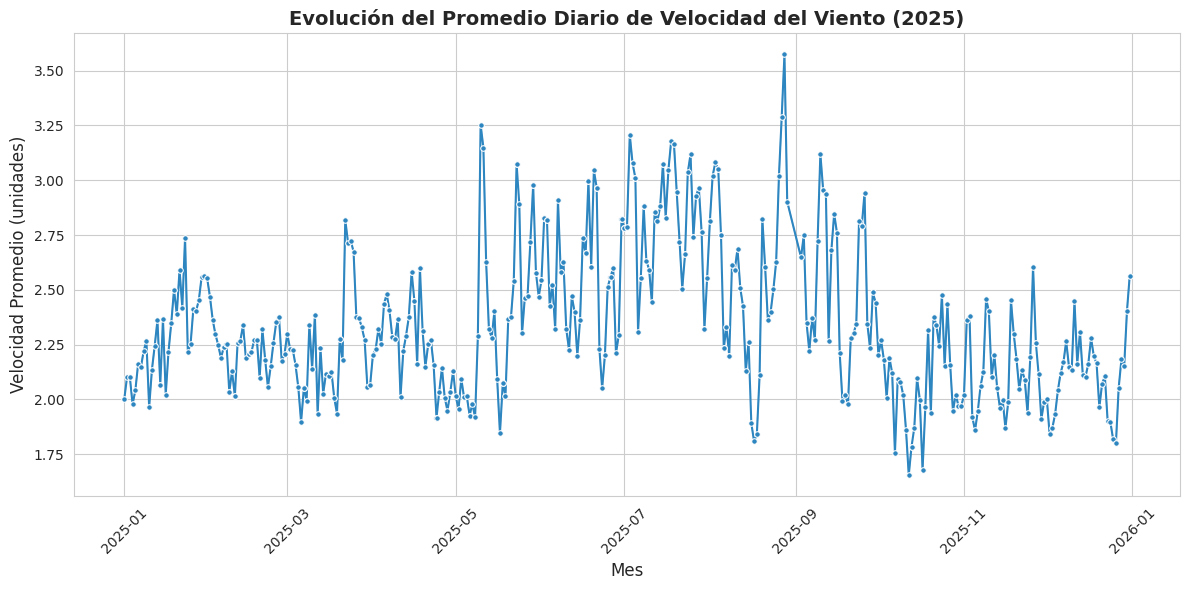

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Filtramos solo las filas que tienen el promedio (las de las 00:00)
# y eliminamos filas con NaN en esa columna para evitar saltos en el gráfico
df_grafico = data_madre[data_madre['Hora'] == 0].dropna(subset=['Viento_Promedio_Diario'])

# 2. Configuración estética
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# 3. Crear el gráfico de línea
sns.lineplot(
    data=df_grafico,
    x='Fecha',
    y='Viento_Promedio_Diario',
    marker='o',          # Añade puntos en cada día
    markersize=4,
    color='#2E86C1',     # Un azul profesional
    linewidth=1.5
)

# 4. Personalización de etiquetas
plt.title('Evolución del Promedio Diario de Velocidad del Viento (2025)', fontsize=14, fontweight='bold')
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Velocidad Promedio (unidades)', fontsize=12)

# Ajustar las etiquetas del eje X para que se vean mejor los meses
plt.xticks(rotation=45)
plt.tight_layout()

# 5. Mostrar gráfico
plt.show()

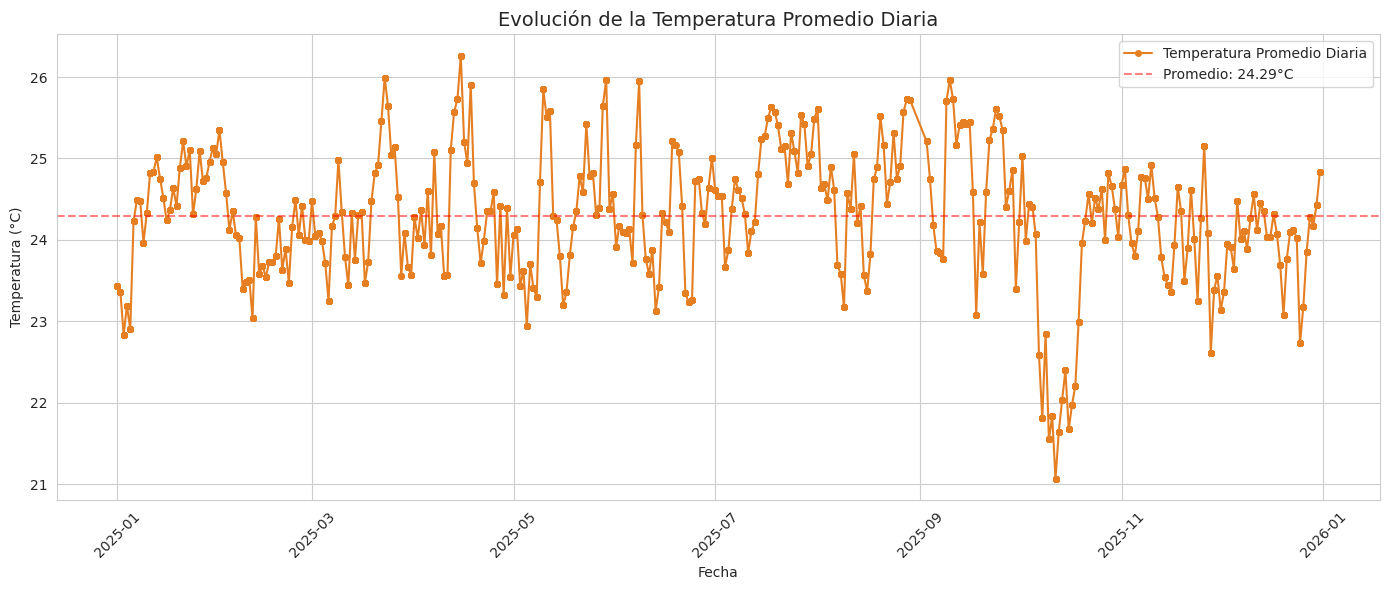

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Filtrar solo las filas donde existe el dato (medianoche)
# Usamos .copy() para evitar advertencias de SettingWithCopy
df_temp = data_madre[data_madre['Hora'] == 0].copy()

# 2. Ordenar cronológicamente y limpiar nulos
df_temp = df_temp.sort_values('Fecha').dropna(subset=['Temperatura_promedio'])

# 3. Configuración del gráfico
plt.figure(figsize=(14, 6))
sns.set_style("whitegrid")

# 4. Graficar
plt.plot(
    df_temp['Fecha'],
    df_temp['Temperatura_promedio'],
    color='#E67E22',
    marker='o',
    markersize=4,
    linewidth=1.5,
    label='Temperatura Promedio Diaria'
)

# 5. Personalización
plt.title('Evolución de la Temperatura Promedio Diaria', fontsize=14)
plt.xlabel('Fecha')
plt.ylabel('Temperatura (°C)')
plt.xticks(rotation=45)

# Añadir línea de promedio general como referencia
promedio_anual = df_temp['Temperatura_promedio'].mean()
plt.axhline(promedio_anual, color='red', linestyle='--', alpha=0.5, label=f'Promedio: {promedio_anual:.2f}°C')

plt.legend()
plt.tight_layout()
plt.show()